# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error

# Loading data
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB6K,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,101250425,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGAEE5M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,224162858,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10
2,5YJSA1E65N,Yakima,Granger,WA,98932.0,2022,TESLA,MODEL S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,187279214,POINT (-120.1871 46.33949),PACIFICORP,5.307700e+10
3,5YJ3E1EBXN,King,Bellevue,WA,98004.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,41.0,219428079,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,JM3KKEHA8S,Thurston,Yelm,WA,98597.0,2025,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,2.0,277791643,POINT (-122.60735 46.94239),PUGET SOUND ENERGY INC,5.306701e+10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246137 entries, 0 to 246136
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         246137 non-null  object 
 1   County                                             246133 non-null  object 
 2   City                                               246133 non-null  object 
 3   State                                              246137 non-null  object 
 4   Postal Code                                        246133 non-null  float64
 5   Model Year                                         246137 non-null  int64  
 6   Make                                               246137 non-null  object 
 7   Model                                              246137 non-null  object 
 8   Electric Vehicle Type                              246137 non-null  object

In [ ]:
df.isnull().sum()

,0
VIN (1-10),0
County,4
City,4
State,0
Postal Code,4
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
df.isnull().mean() * 100

,0
VIN (1-10),0.000000
County,0.001625
City,0.001625
State,0.000000
Postal Code,0.001625
Model Year,0.000000
Make,0.000000
Model,0.000000
Electric Vehicle Type,0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0.000000


In [ ]:
# Identifying Numerical and Categorical Variables
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', '2020 Census Tract']
Categorical Columns: ['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location', 'Electric Utility']


In [ ]:
df_dropped = df.dropna()
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245573 entries, 0 to 246136
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         245573 non-null  object 
 1   County                                             245573 non-null  object 
 2   City                                               245573 non-null  object 
 3   State                                              245573 non-null  object 
 4   Postal Code                                        245573 non-null  float64
 5   Model Year                                         245573 non-null  int64  
 6   Make                                               245573 non-null  object 
 7   Model                                              245573 non-null  object 
 8   Electric Vehicle Type                              245573 non-null  object 
 9 

In [ ]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB6K,99.0,641.0,45.0,98178.0,2019,39.0,99.0,0.0,0.0,220.0,0.0,37.0,101250425,POINT (-122.23825 47.49461),57.0,5.303301e+10
1,5YJYGAEE5M,214.0,646.0,45.0,98942.0,2021,39.0,102.0,0.0,1.0,0.0,0.0,15.0,224162858,POINT (-120.53145 46.65405),65.0,5.307700e+10
2,5YJSA1E65N,214.0,279.0,45.0,98932.0,2022,39.0,100.0,0.0,1.0,0.0,0.0,15.0,187279214,POINT (-120.1871 46.33949),65.0,5.307700e+10
3,5YJ3E1EBXN,99.0,51.0,45.0,98004.0,2022,39.0,99.0,0.0,1.0,0.0,0.0,41.0,219428079,POINT (-122.1872 47.61001),74.0,5.303302e+10
4,JM3KKEHA8S,194.0,800.0,45.0,98597.0,2025,26.0,38.0,1.0,2.0,26.0,0.0,2.0,277791643,POINT (-122.60735 46.94239),73.0,5.306701e+10


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Encode categorical variables
oe = OrdinalEncoder()
categorical_cols = ["VIN (1-10)", "County", "City", "State", "Make", "Model",
                    "Electric Vehicle Type",
                    "Clean Alternative Fuel Vehicle (CAFV) Eligibility",
                    "Electric Utility"]
df[categorical_cols] = oe.fit_transform(df[categorical_cols])

In [ ]:
# Define Features (X) and Target Variable (y)
X = df.drop("Electric Range", axis=1)  # Predicting 'Electric Range'
y = df["Electric Range"]

# Drop rows with missing values before splitting and scaling
X = X.dropna()
y = y.loc[X.index] # Ensure corresponding labels remain

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Label encoding using factorize to handle unseen labels
for col in ['Vehicle Location']:
    # Factorize returns two outputs: the encoded array and unique labels, we only use the first
    X_train[col], unique = pd.factorize(X_train[col])

    # Apply the mapping from train to test, unknown values will be assigned -1
    X_test[col] = X_test[col].map({val: i for i, val in enumerate(unique)}).fillna(-1).astype(int)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

y_pred = linear_reg_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Percentage Error: {mape:.2f}")

Mean Absolute Error: 40.72
Mean Squared Error: 3179.96
R-squared: 0.53
Mean Absolute Percentage Error: 53872642200193328.00


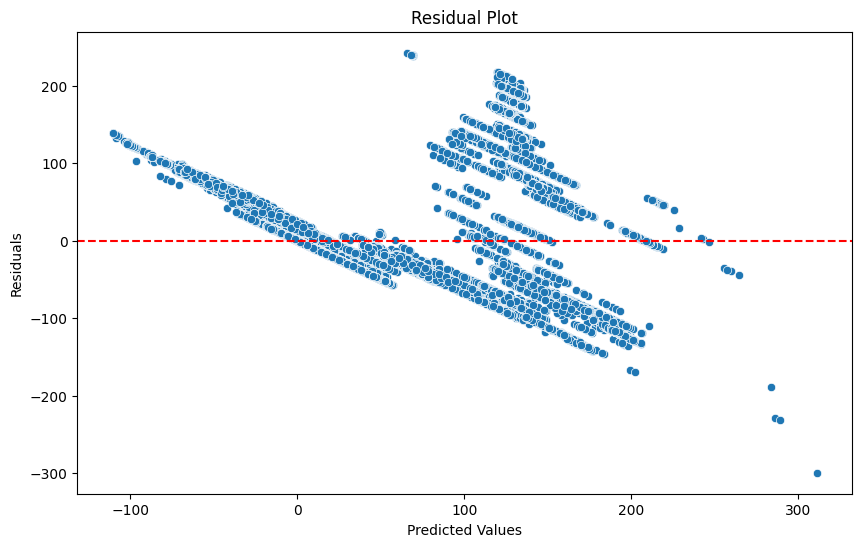

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot of Linear Regression')
plt.show()

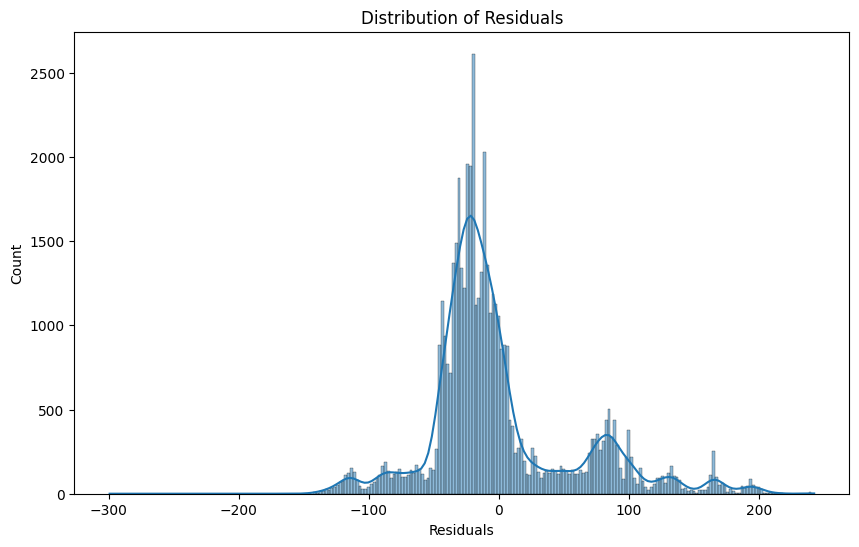

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals of Linear Regression')
plt.show()

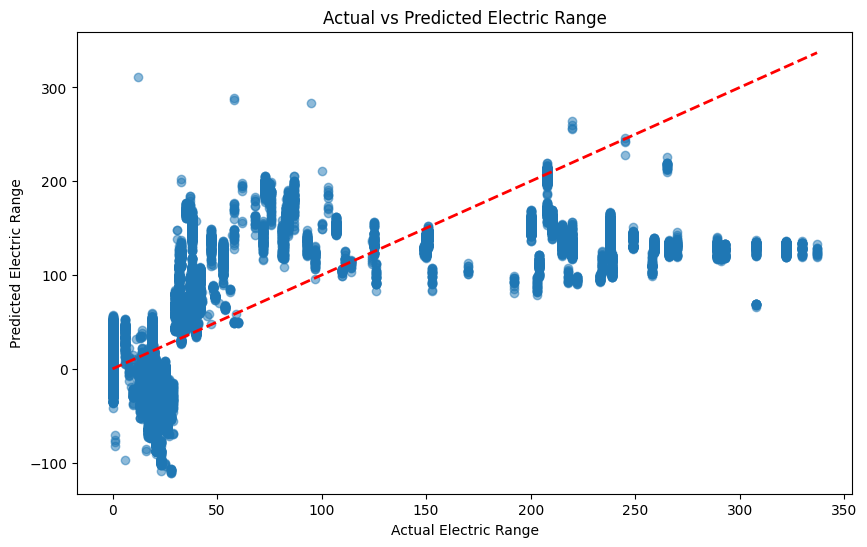

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Plot the ideal line y=x
plt.xlabel("Actual Electric Range")
plt.ylabel("Predicted Electric Range")
plt.title("Actual vs Predicted Electric Range of Linear Regression")
plt.show()

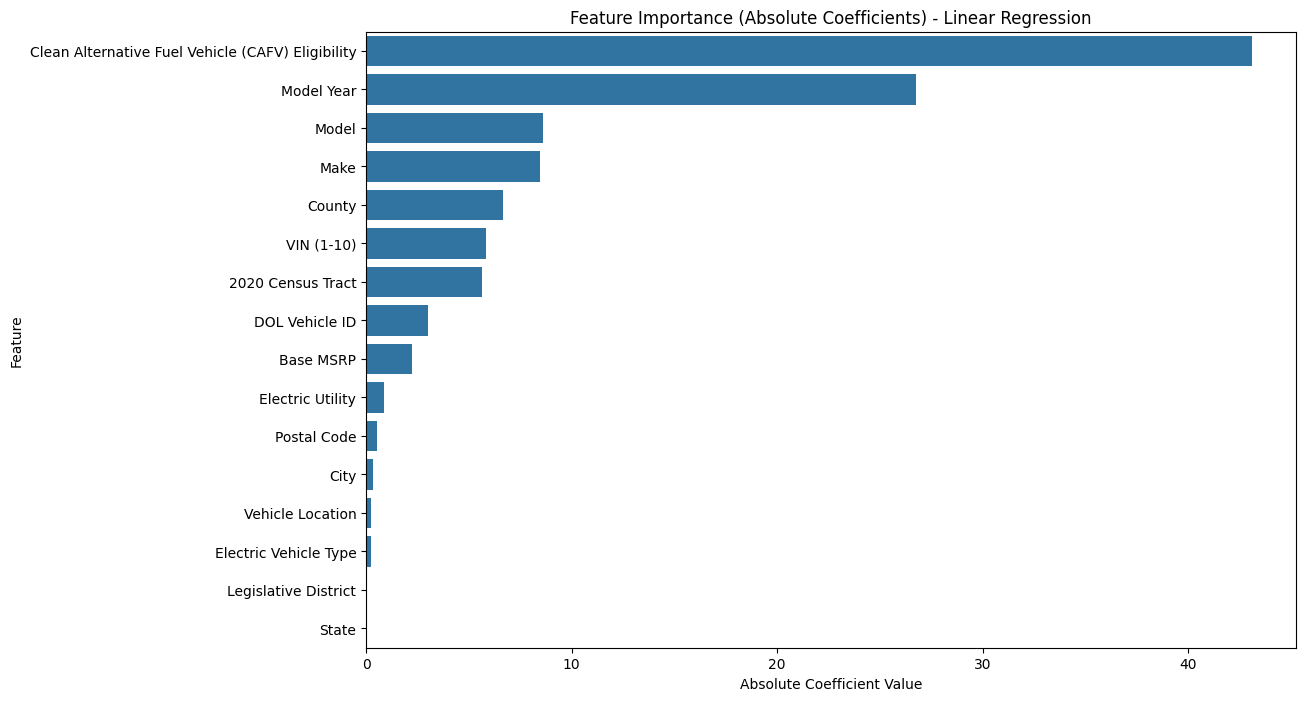

In [ ]:
feature_names = df.drop("Electric Range", axis=1).dropna().columns

# Get the coefficients from the trained model
coefficients = linear_reg_model.coef_

# Create a DataFrame to visualize feature importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort by the absolute value of the coefficient
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance (Absolute Coefficients) - Linear Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

print("\nRandom Forest Regressor Performance:")
print(f"Mean Absolute Error: {mae_rf:.2f}")
print(f"Mean Squared Error: {mse_rf:.2f}")
print(f"R-squared: {r2_rf:.2f}")
print(f"Mean Absolute Percentage Error: {mape_rf:.2f}")


Random Forest Regressor Performance:
Mean Absolute Error: 0.00
Mean Squared Error: 0.07
R-squared: 1.00
Mean Absolute Percentage Error: 4680112490705.29


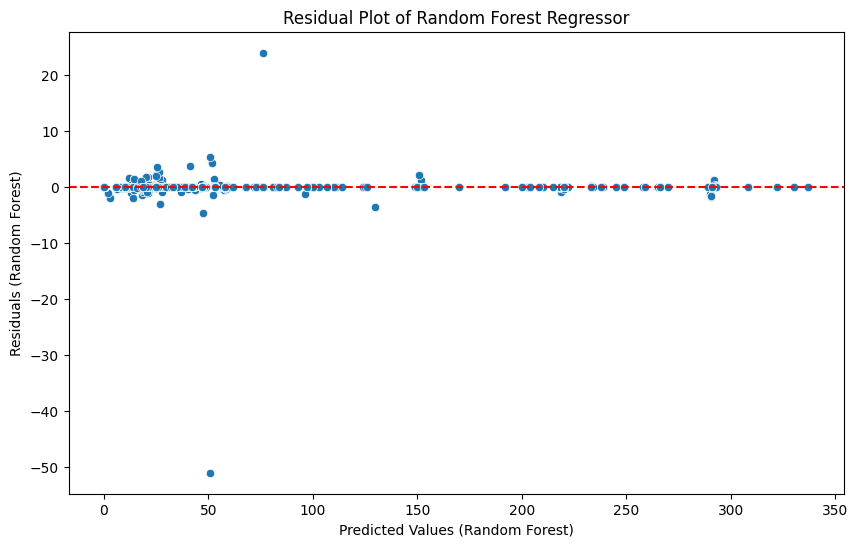

In [ ]:
residuals_rf = y_test - y_pred_rf

# Plotting residuals for Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values (Random Forest)')
plt.ylabel('Residuals (Random Forest)')
plt.title('Residual Plot of Random Forest Regressor')
plt.show()

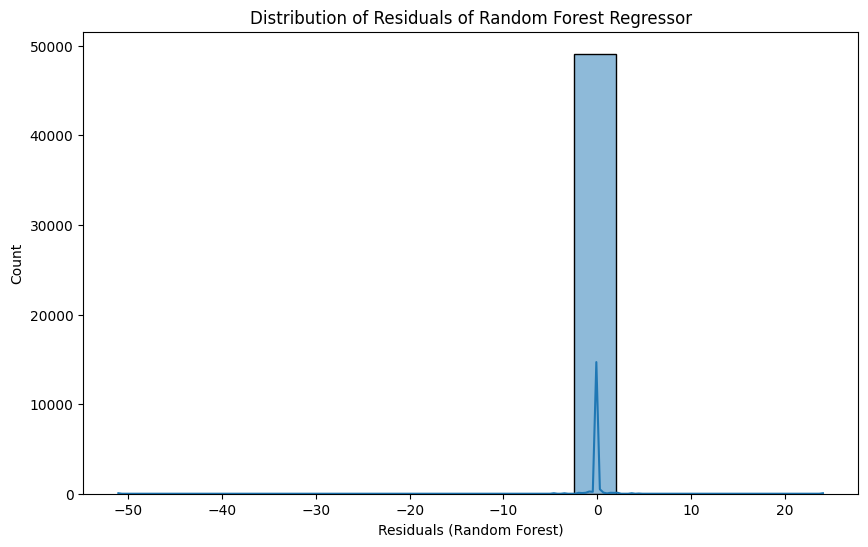

In [ ]:
# Distribution of residuals for Random Forest
plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, kde=True)
plt.xlabel('Residuals (Random Forest)')
plt.title('Distribution of Residuals of Random Forest Regressor')
plt.show()

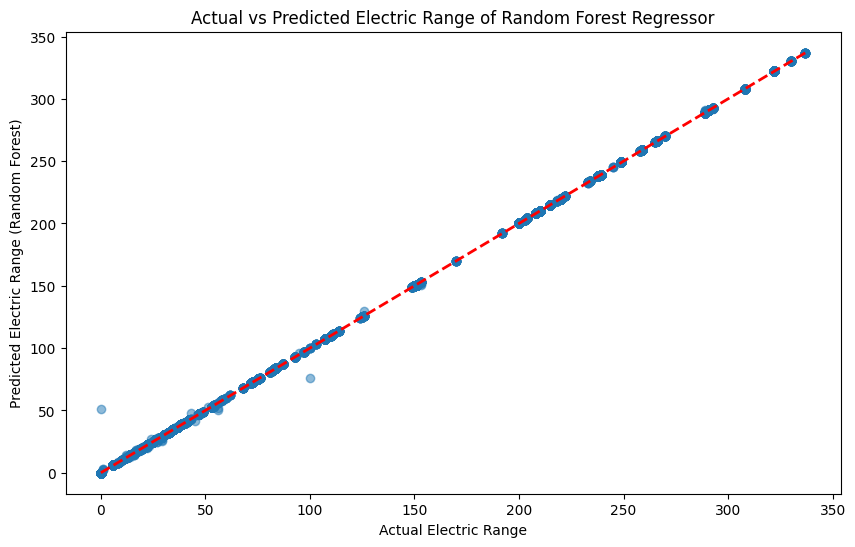

In [ ]:
# Actual vs Predicted for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Plot the ideal line y=x
plt.xlabel("Actual Electric Range")
plt.ylabel("Predicted Electric Range (Random Forest)")
plt.title("Actual vs Predicted Electric Range of Random Forest Regressor")
plt.show()

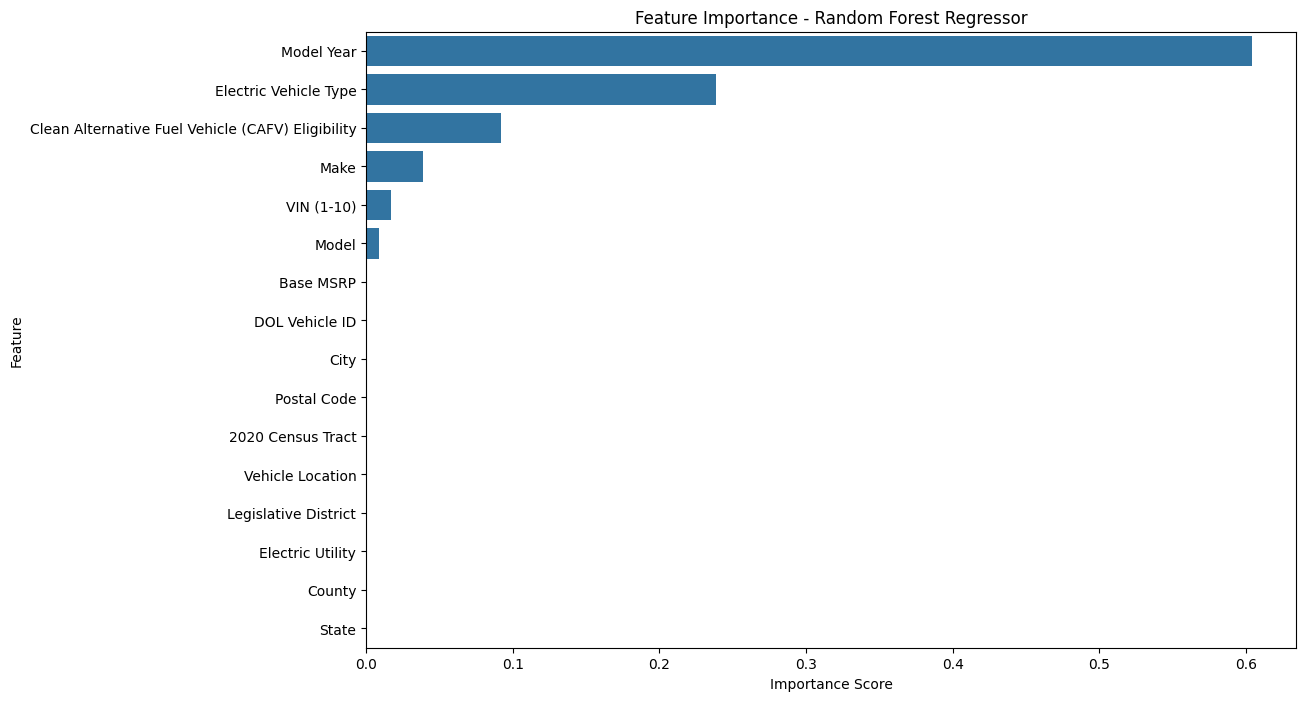

In [ ]:
# Feature Importance for Random Forest
feature_importances_rf = pd.DataFrame({'Feature': feature_names, 'Importance': rf_model.feature_importances_})
feature_importances_rf = feature_importances_rf.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_rf)
plt.title('Feature Importance - Random Forest Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'fit_intercept': [True, False],
    'n_jobs': [-1] # Use all available cores
}

grid_search_lr = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform GridSearchCV on the training data
grid_search_lr.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("\nBest parameters for Linear Regression after tuning:")
print(grid_search_lr.best_params_)

# Get the best Linear Regression model from GridSearchCV
best_linear_reg_model = grid_search_lr.best_estimator_

# Make predictions with the best model
y_pred_tuned_lr = best_linear_reg_model.predict(X_test)

# Evaluate the best Linear Regression model
mae_tuned_lr = mean_absolute_error(y_test, y_pred_tuned_lr)
mse_tuned_lr = mean_squared_error(y_test, y_pred_tuned_lr)
r2_tuned_lr = r2_score(y_test, y_pred_tuned_lr)
mape_tuned_lr = mean_absolute_percentage_error(y_test, y_pred_tuned_lr)

print("\nBest Tuned Linear Regression Performance:")
print(f"Mean Absolute Error: {mae_tuned_lr:.2f}")
print(f"Mean Squared Error: {mse_tuned_lr:.2f}")
print(f"R-squared: {r2_tuned_lr:.2f}")
print(f"Mean Absolute Percentage Error: {mape_tuned_lr:.2f}")


Best parameters for Linear Regression after tuning:
{'fit_intercept': True, 'n_jobs': -1}

Best Tuned Linear Regression Performance:
Mean Absolute Error: 40.72
Mean Squared Error: 3179.96
R-squared: 0.53
Mean Absolute Percentage Error: 53872642200193328.00


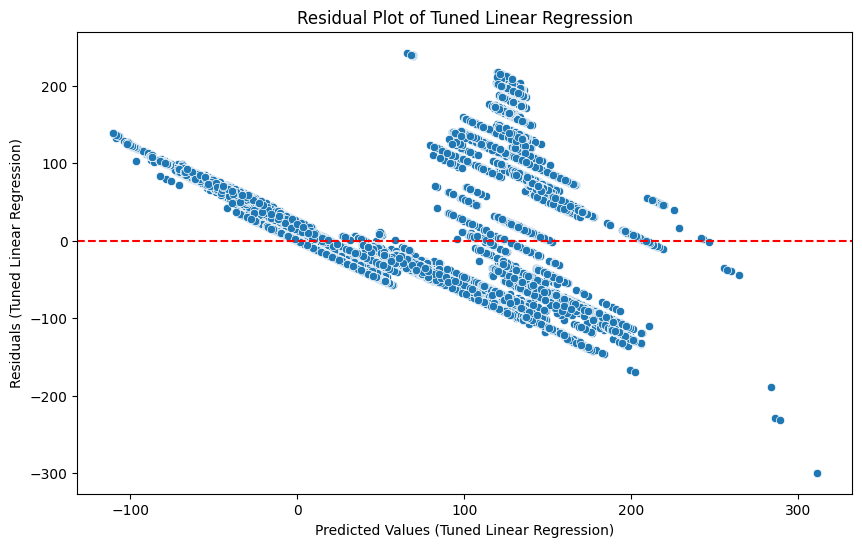

In [ ]:
residuals_tuned_lr = y_test - y_pred_tuned_lr

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_tuned_lr, y=residuals_tuned_lr)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values (Tuned Linear Regression)')
plt.ylabel('Residuals (Tuned Linear Regression)')
plt.title('Residual Plot of Tuned Linear Regression')
plt.show()

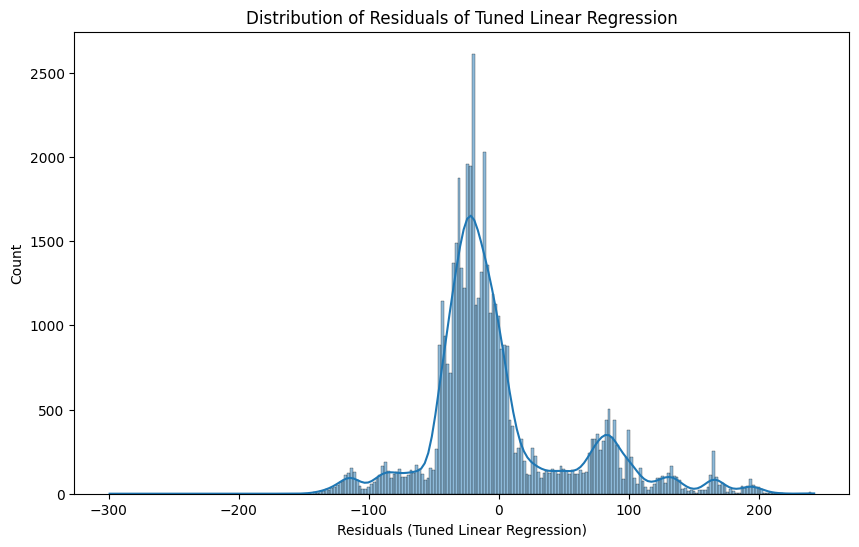

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals_tuned_lr, kde=True)
plt.xlabel('Residuals (Tuned Linear Regression)')
plt.title('Distribution of Residuals of Tuned Linear Regression')
plt.show()

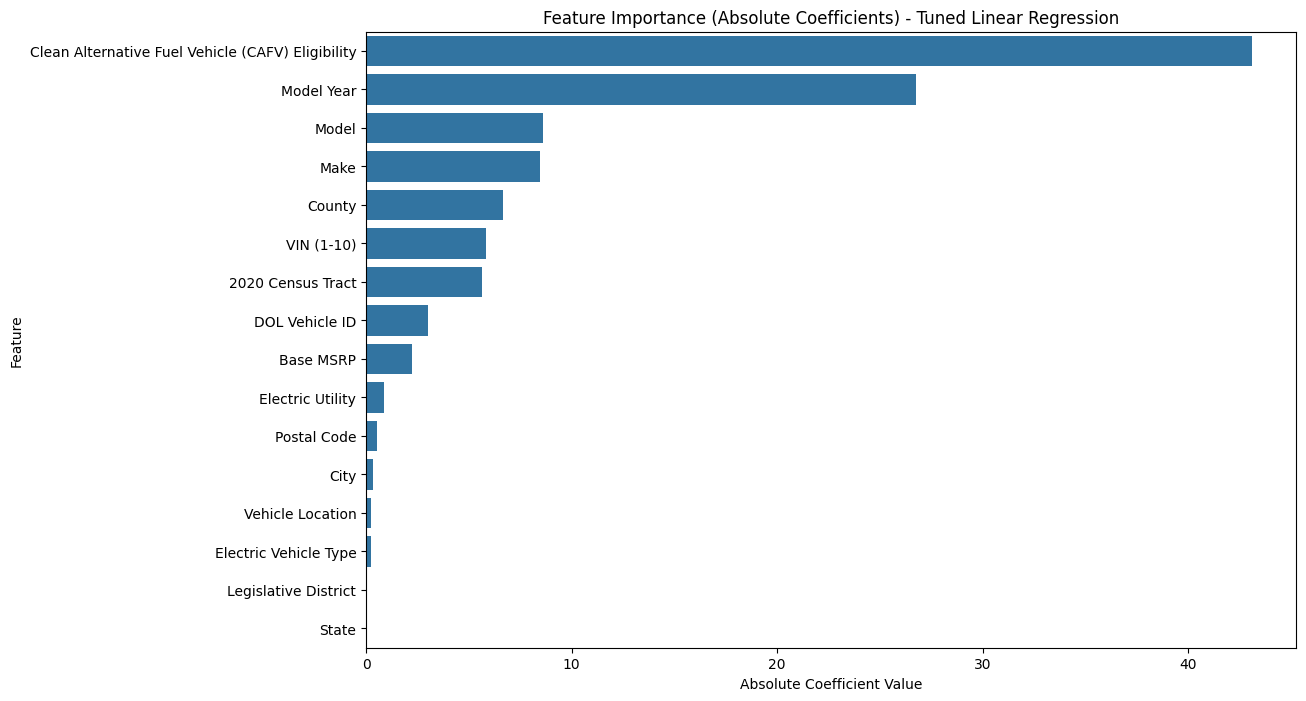

In [ ]:
coefficients_tuned_lr = best_linear_reg_model.coef_

# Create a DataFrame to visualize feature importance
feature_importance_tuned_lr = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients_tuned_lr})

# Sort by the absolute value of the coefficient
feature_importance_tuned_lr['Abs_Coefficient'] = abs(feature_importance_tuned_lr['Coefficient'])
feature_importance_tuned_lr = feature_importance_tuned_lr.sort_values(by='Abs_Coefficient', ascending=False)

# Plot the feature importance for the tuned model
plt.figure(figsize=(12, 8))
sns.barplot(x='Abs_Coefficient', y='Feature', data=feature_importance_tuned_lr)
plt.title('Feature Importance (Absolute Coefficients) - Tuned Linear Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [ ]:
!pip install xgboost lightgbm -q

from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb

# Initialize and train the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)

# Make predictions
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate the Gradient Boosting model
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
mape_gbr = mean_absolute_percentage_error(y_test, y_pred_gbr)

print("\nGradient Boosting Regressor Performance:")
print(f"Mean Absolute Error: {mae_gbr:.2f}")
print(f"Mean Squared Error: {mse_gbr:.2f}")
print(f"R-squared: {r2_gbr:.2f}")
print(f"Mean Absolute Percentage Error: {mape_gbr:.2f}")


Gradient Boosting Regressor Performance:
Mean Absolute Error: 3.13
Mean Squared Error: 61.44
R-squared: 0.99
Mean Absolute Percentage Error: 1186546045176341.50


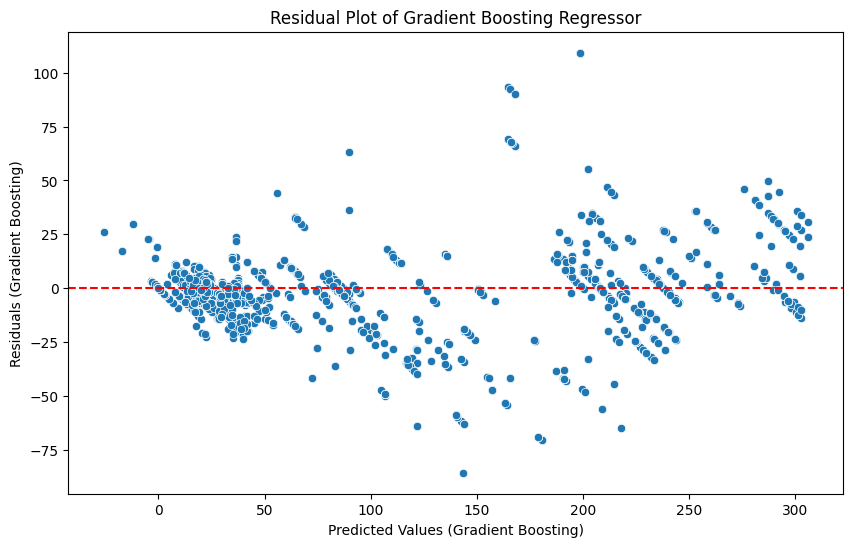

In [ ]:
residuals_gbr = y_test - y_pred_gbr

# Plotting residuals for Gradient Boosting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_gbr, y=residuals_gbr)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values (Gradient Boosting)')
plt.ylabel('Residuals (Gradient Boosting)')
plt.title('Residual Plot of Gradient Boosting Regressor')
plt.show()

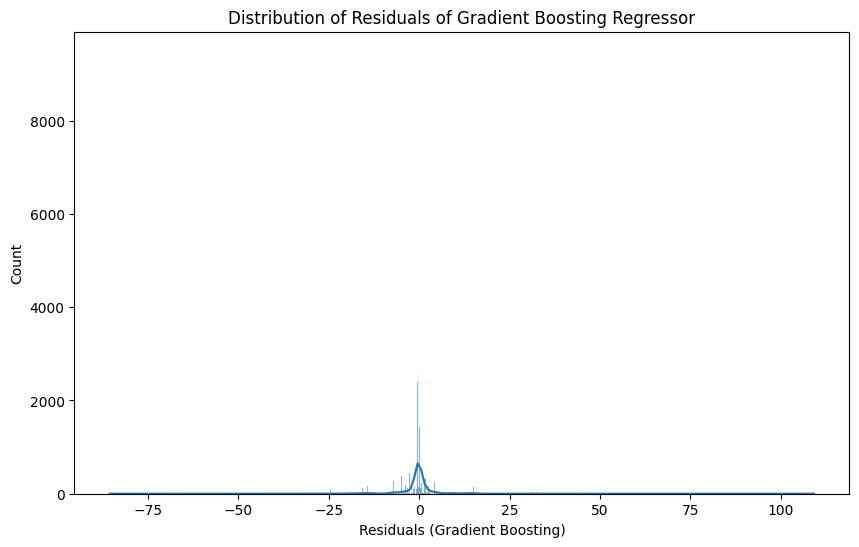

In [ ]:
# Distribution of residuals for Gradient Boosting
plt.figure(figsize=(10, 6))
sns.histplot(residuals_gbr, kde=True)
plt.xlabel('Residuals (Gradient Boosting)')
plt.title('Distribution of Residuals of Gradient Boosting Regressor')
plt.show()

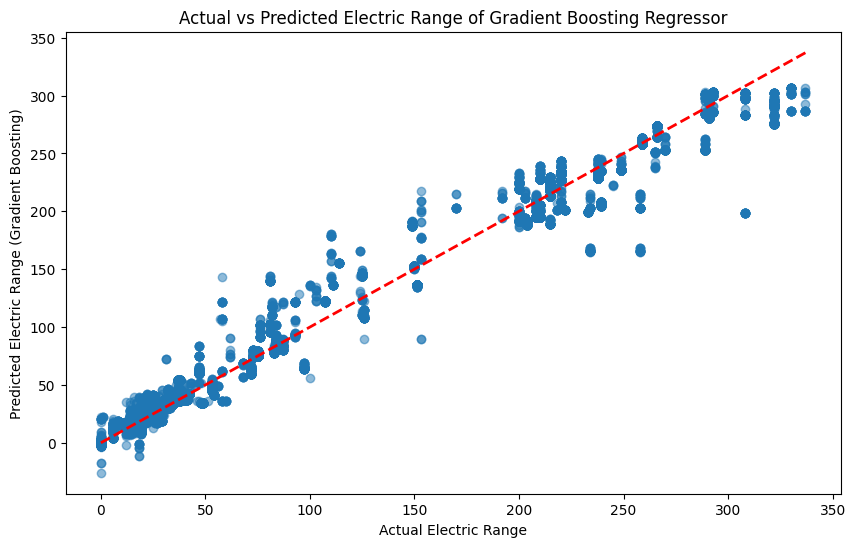

In [ ]:
# Actual vs Predicted for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Plot the ideal line y=x
plt.xlabel("Actual Electric Range")
plt.ylabel("Predicted Electric Range (Gradient Boosting)")
plt.title("Actual vs Predicted Electric Range of Gradient Boosting Regressor")
plt.show()

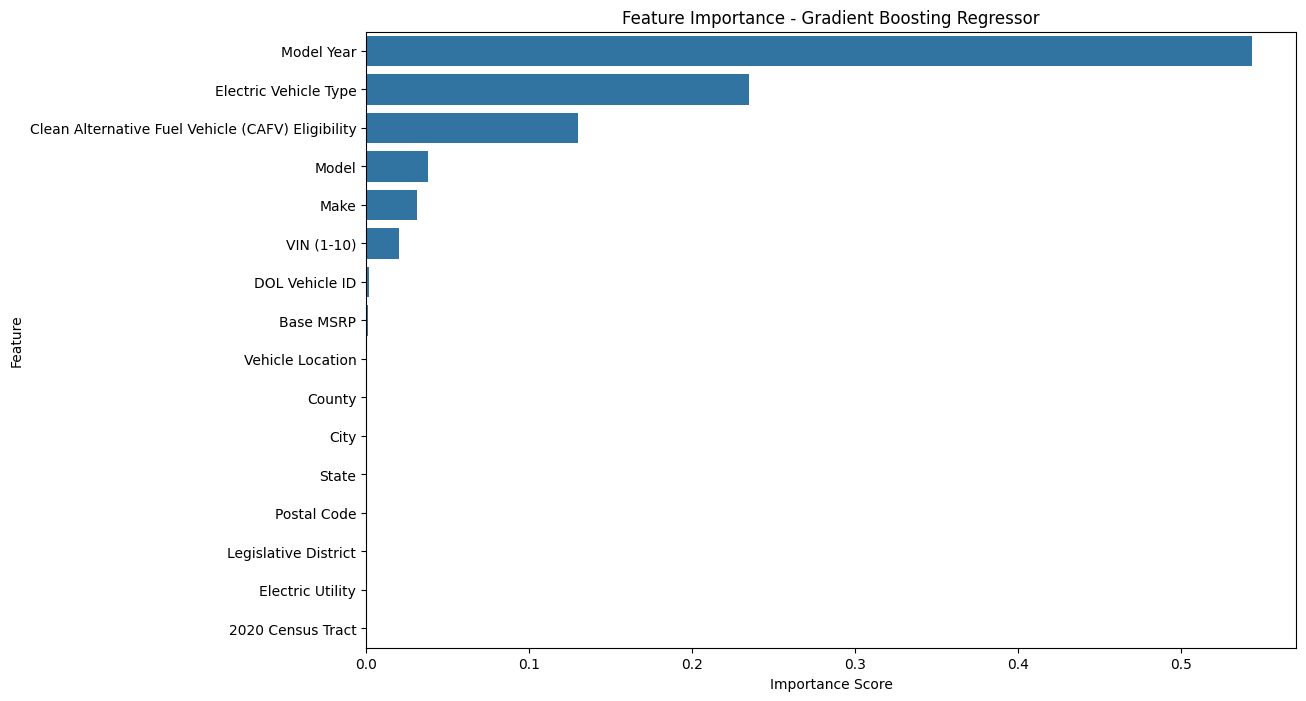

In [ ]:
# Feature Importance for Gradient Boosting
feature_importances_gbr = pd.DataFrame({'Feature': feature_names, 'Importance': gbr_model.feature_importances_})
feature_importances_gbr = feature_importances_gbr.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_gbr)
plt.title('Feature Importance - Gradient Boosting Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Optional: Train and evaluate XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=100, learning_rate=0.1,
                             max_depth=3, random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print("\nXGBoost Regressor Performance:")
print(f"Mean Absolute Error: {mae_xgb:.2f}")
print(f"Mean Squared Error: {mse_xgb:.2f}")
print(f"R-squared: {r2_xgb:.2f}")
print(f"Mean Absolute Percentage Error: {mape_xgb:.2f}")


XGBoost Regressor Performance:
Mean Absolute Error: 3.28
Mean Squared Error: 66.33
R-squared: 0.99
Mean Absolute Percentage Error: 1389201402415841.75


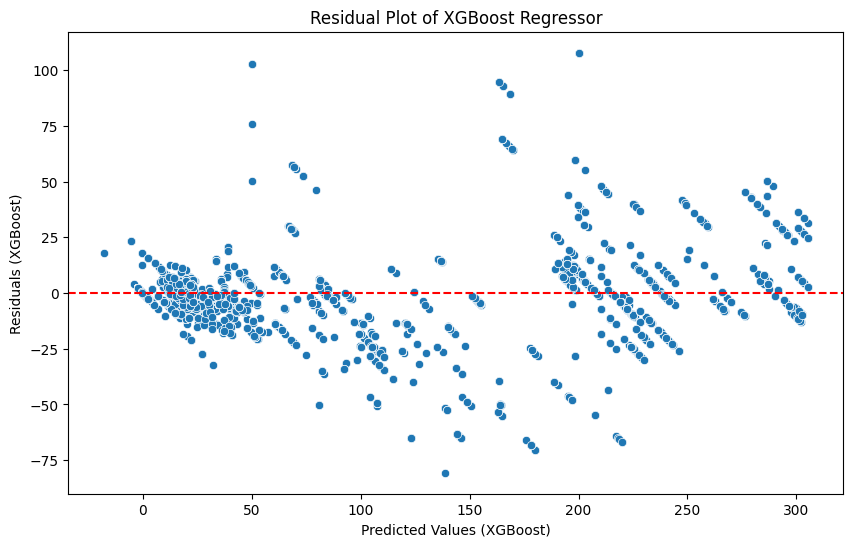

In [ ]:
residuals_xgb = y_test - y_pred_xgb

# Plotting residuals for XGBoost
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_xgb, y=residuals_xgb)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values (XGBoost)')
plt.ylabel('Residuals (XGBoost)')
plt.title('Residual Plot of XGBoost Regressor')
plt.show()

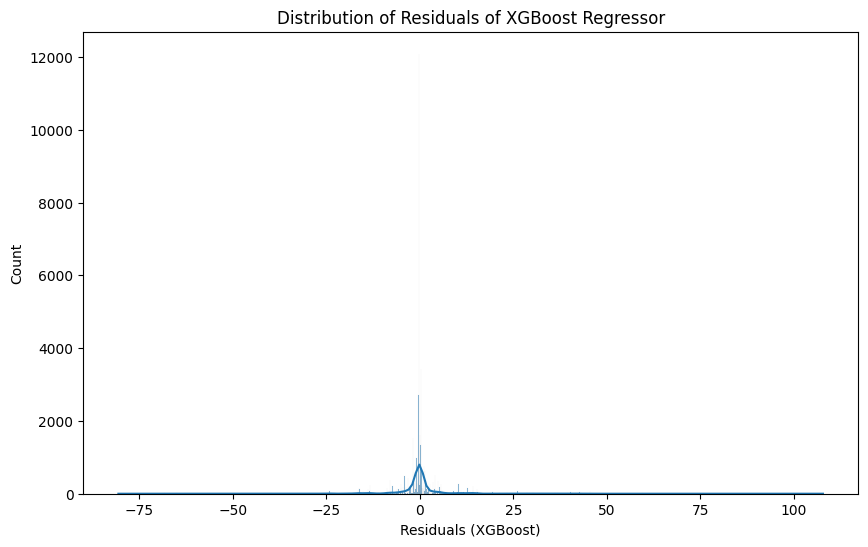

In [ ]:
# Distribution of residuals for XGBoost
plt.figure(figsize=(10, 6))
sns.histplot(residuals_xgb, kde=True)
plt.xlabel('Residuals (XGBoost)')
plt.title('Distribution of Residuals of XGBoost Regressor')
plt.show()

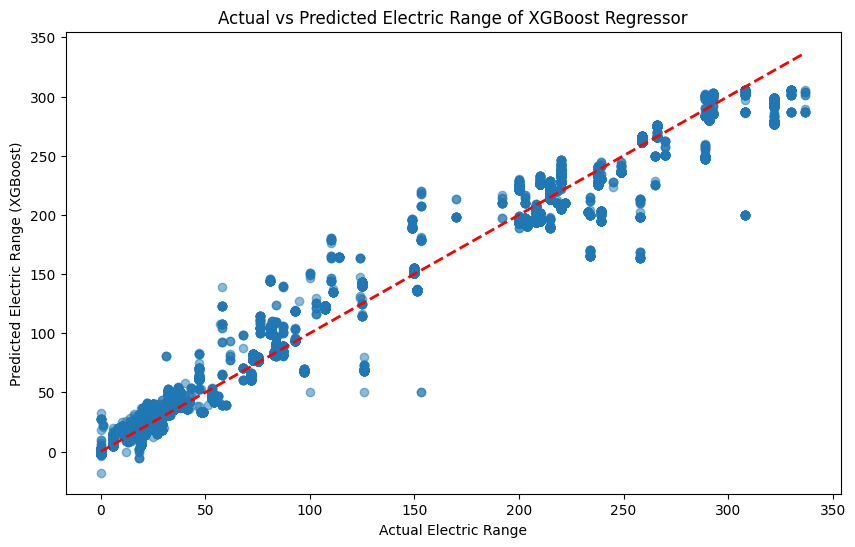

In [ ]:
# Actual vs Predicted for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Plot the ideal line y=x
plt.xlabel("Actual Electric Range")
plt.ylabel("Predicted Electric Range (XGBoost)")
plt.title("Actual vs Predicted Electric Range of XGBoost Regressor")
plt.show()

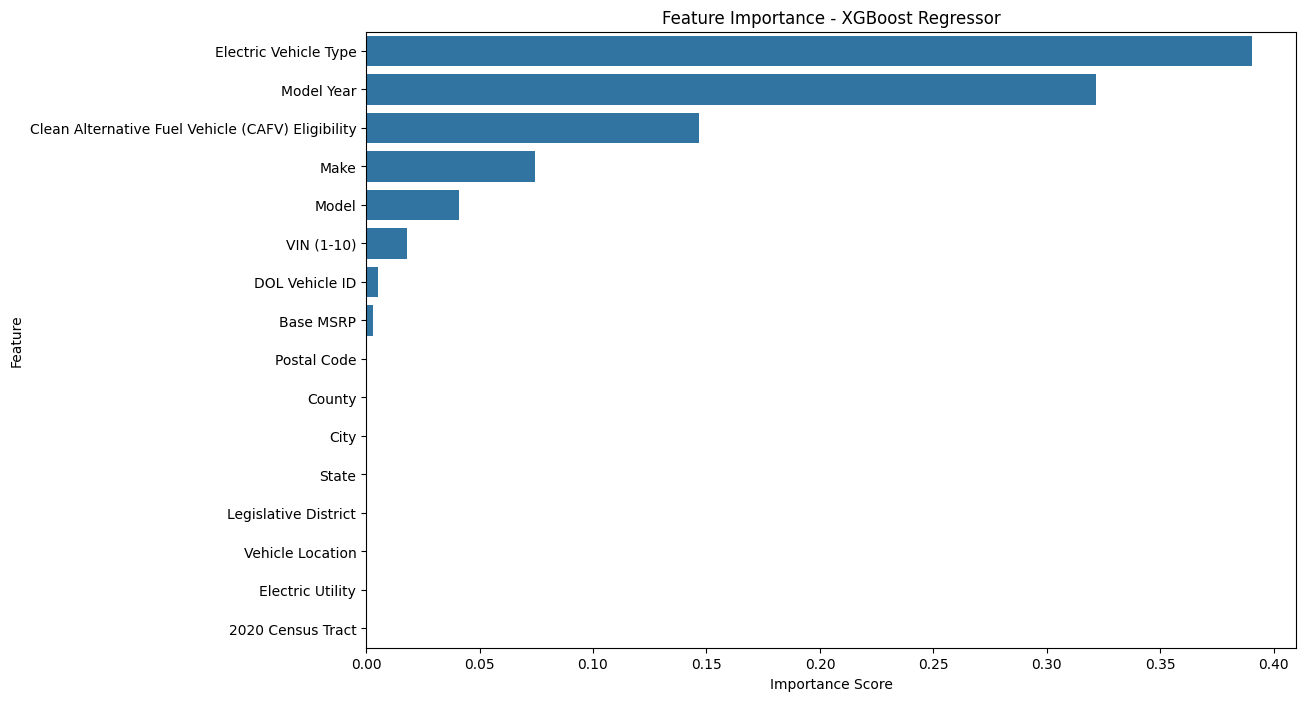

In [ ]:
# Feature Importance for XGBoost
feature_importances_xgb = pd.DataFrame({'Feature': feature_names,
                                        'Importance': xgb_model.feature_importances_})
feature_importances_xgb = feature_importances_xgb.sort_values(by='Importance',
                                                              ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_xgb)
plt.title('Feature Importance - XGBoost Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Optional: Train and evaluate LightGBM Regressor
lgb_model = lgb.LGBMRegressor(objective='regression',
                              n_estimators=100,
                              learning_rate=0.1,
                              max_depth=-1,
                              random_state=42,
                              n_jobs=-1)
lgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)

mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)
mape_lgb = mean_absolute_percentage_error(y_test, y_pred_lgb)

print("\nLightGBM Regressor Performance:")
print(f"Mean Absolute Error: {mae_lgb:.2f}")
print(f"Mean Squared Error: {mse_lgb:.2f}")
print(f"R-squared: {r2_lgb:.2f}")
print(f"Mean Absolute Percentage Error: {mape_lgb:.2f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030845 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1861
[LightGBM] [Info] Number of data points in the train set: 196458, number of used features: 15
[LightGBM] [Info] Start training from score 44.954453

LightGBM Regressor Performance:
Mean Absolute Error: 0.23
Mean Squared Error: 0.76
R-squared: 1.00
Mean Absolute Percentage Error: 51668753850283.32


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


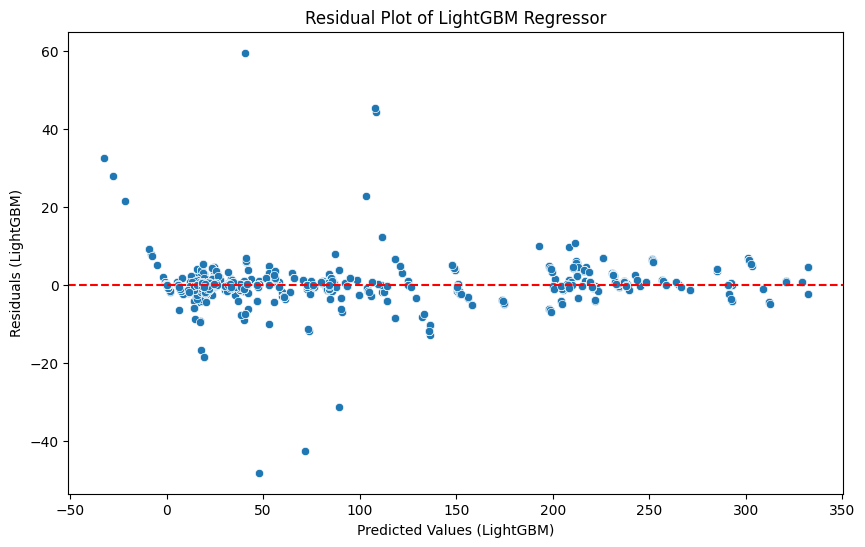

In [ ]:
# Residuals plot for LightGBM
residuals_lgb = y_test - y_pred_lgb

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_lgb, y=residuals_lgb)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values (LightGBM)')
plt.ylabel('Residuals (LightGBM)')
plt.title('Residual Plot of LightGBM Regressor')
plt.show()

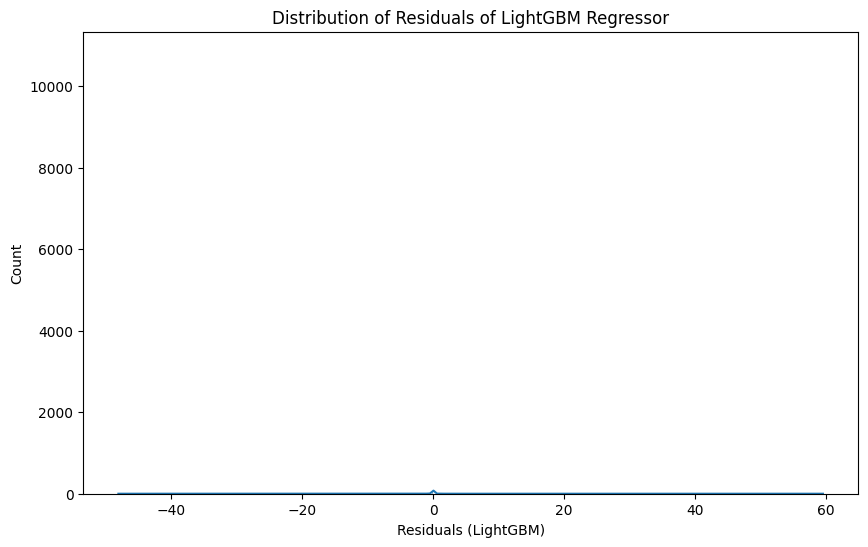

In [ ]:
# Distribution of residuals for LightGBM
plt.figure(figsize=(10, 6))
sns.histplot(residuals_lgb, kde=True)
plt.xlabel('Residuals (LightGBM)')
plt.title('Distribution of Residuals of LightGBM Regressor')
plt.show()

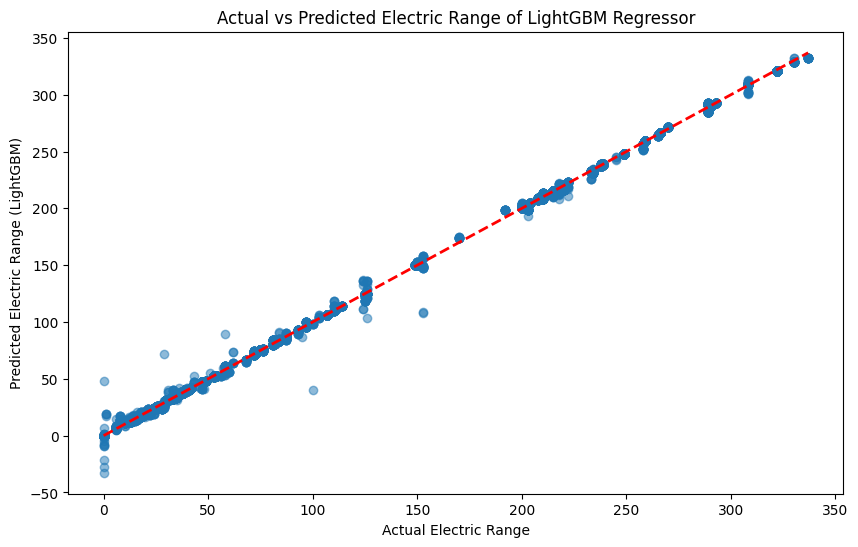

In [ ]:
# Actual vs Predicted for LightGBM
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2) # Plot the ideal line y=x
plt.xlabel("Actual Electric Range")
plt.ylabel("Predicted Electric Range (LightGBM)")
plt.title("Actual vs Predicted Electric Range of LightGBM Regressor")
plt.show()

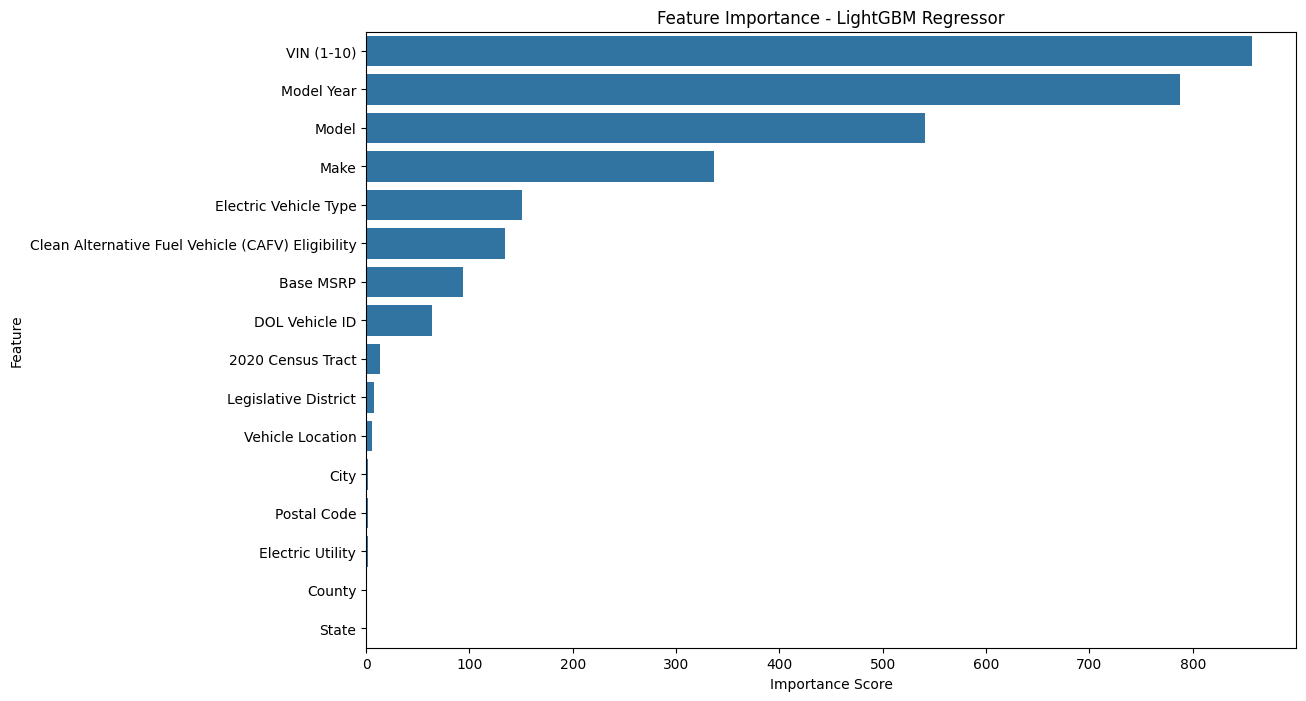

In [ ]:
# Feature Importance for LightGBM
feature_importances_lgb = pd.DataFrame({'Feature': feature_names,
                                        'Importance': lgb_model.feature_importances_})
feature_importances_lgb = feature_importances_lgb.sort_values(by='Importance',
                                                              ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_lgb)
plt.title('Feature Importance - LightGBM Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Create a dictionary to store the evaluation metrics for each model
model_performance = {
  'Linear Regression': {'MAE': mae, 'MSE': mse, 'R2': r2, 'MAPE': mape},
  'Tuned Linear Regression': {'MAE': mae_tuned_lr, 'MSE': mse_tuned_lr, 'R2': r2_tuned_lr, 'MAPE': mape_tuned_lr},
  'Random Forest': {'MAE': mae_rf, 'MSE': mse_rf, 'R2': r2_rf, 'MAPE': mape_rf},
  'Gradient Boosting': {'MAE': mae_gbr, 'MSE': mse_gbr, 'R2': r2_gbr, 'MAPE': mape_gbr},
  'XGBoost': {'MAE': mae_xgb, 'MSE': mse_xgb, 'R2': r2_xgb, 'MAPE': mape_xgb},
  'LightGBM': {'MAE': mae_lgb, 'MSE': mse_lgb, 'R2': r2_lgb, 'MAPE': mape_lgb},
}

# Convert the dictionary to a DataFrame for easy comparison
performance_df = pd.DataFrame(model_performance).T

# Print the performance table
print("\nModel Performance Comparison:")
performance_df


Model Performance Comparison:


,MAE,MSE,R2,MAPE
Linear Regression,40.718169,3179.961825,0.533604,5.387264e+16
Tuned Linear Regression,40.718169,3179.961825,0.533604,5.387264e+16
Random Forest,0.004067,0.069461,0.999990,4.680112e+12
Gradient Boosting,3.126014,61.436600,0.990989,1.186546e+15
XGBoost,3.283766,66.329774,0.990272,1.389201e+15
LightGBM,0.234026,0.764481,0.999888,5.166875e+13



Best model based on R-squared: Random Forest (R2: 1.00)
Best model based on Mean Absolute Error: Random Forest (MAE: 0.00)
Best model based on Mean Squared Error: Random Forest (MSE: 0.07)
Best model based on Mean Absolute Percentage Error: Random Forest (MAPE: 4680112490705.29)


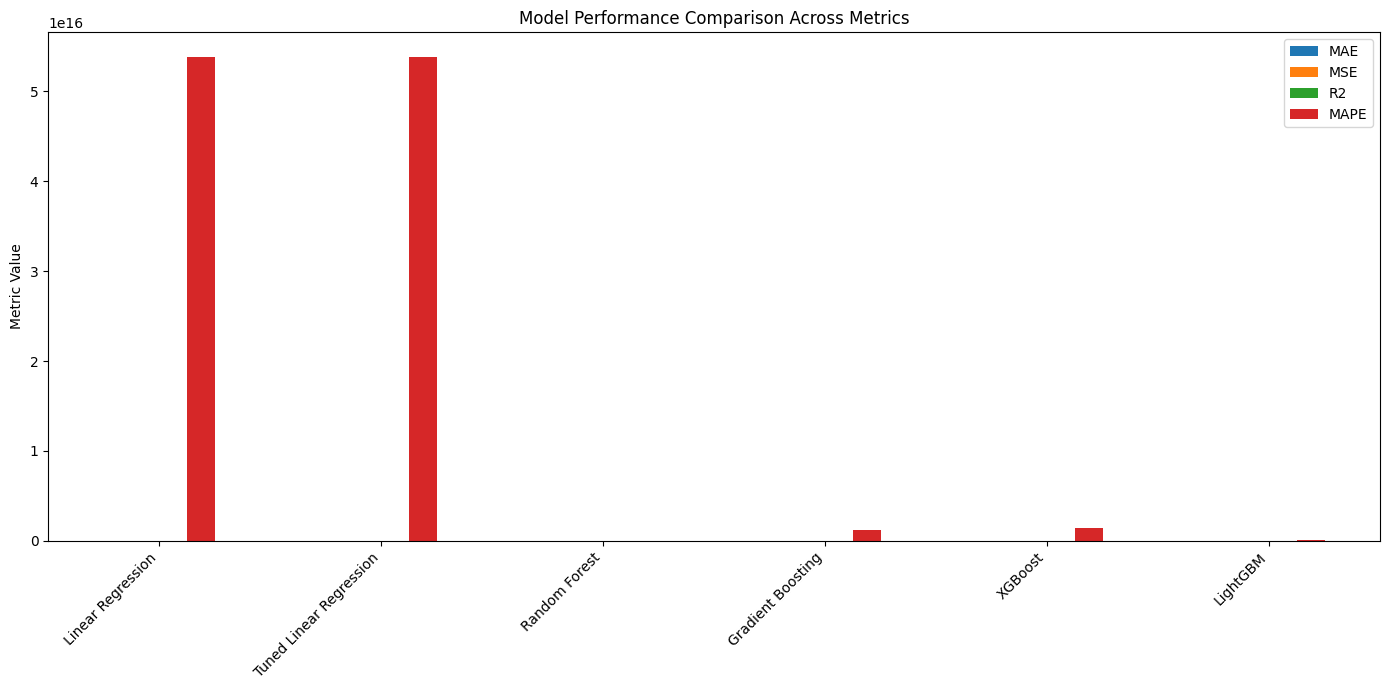

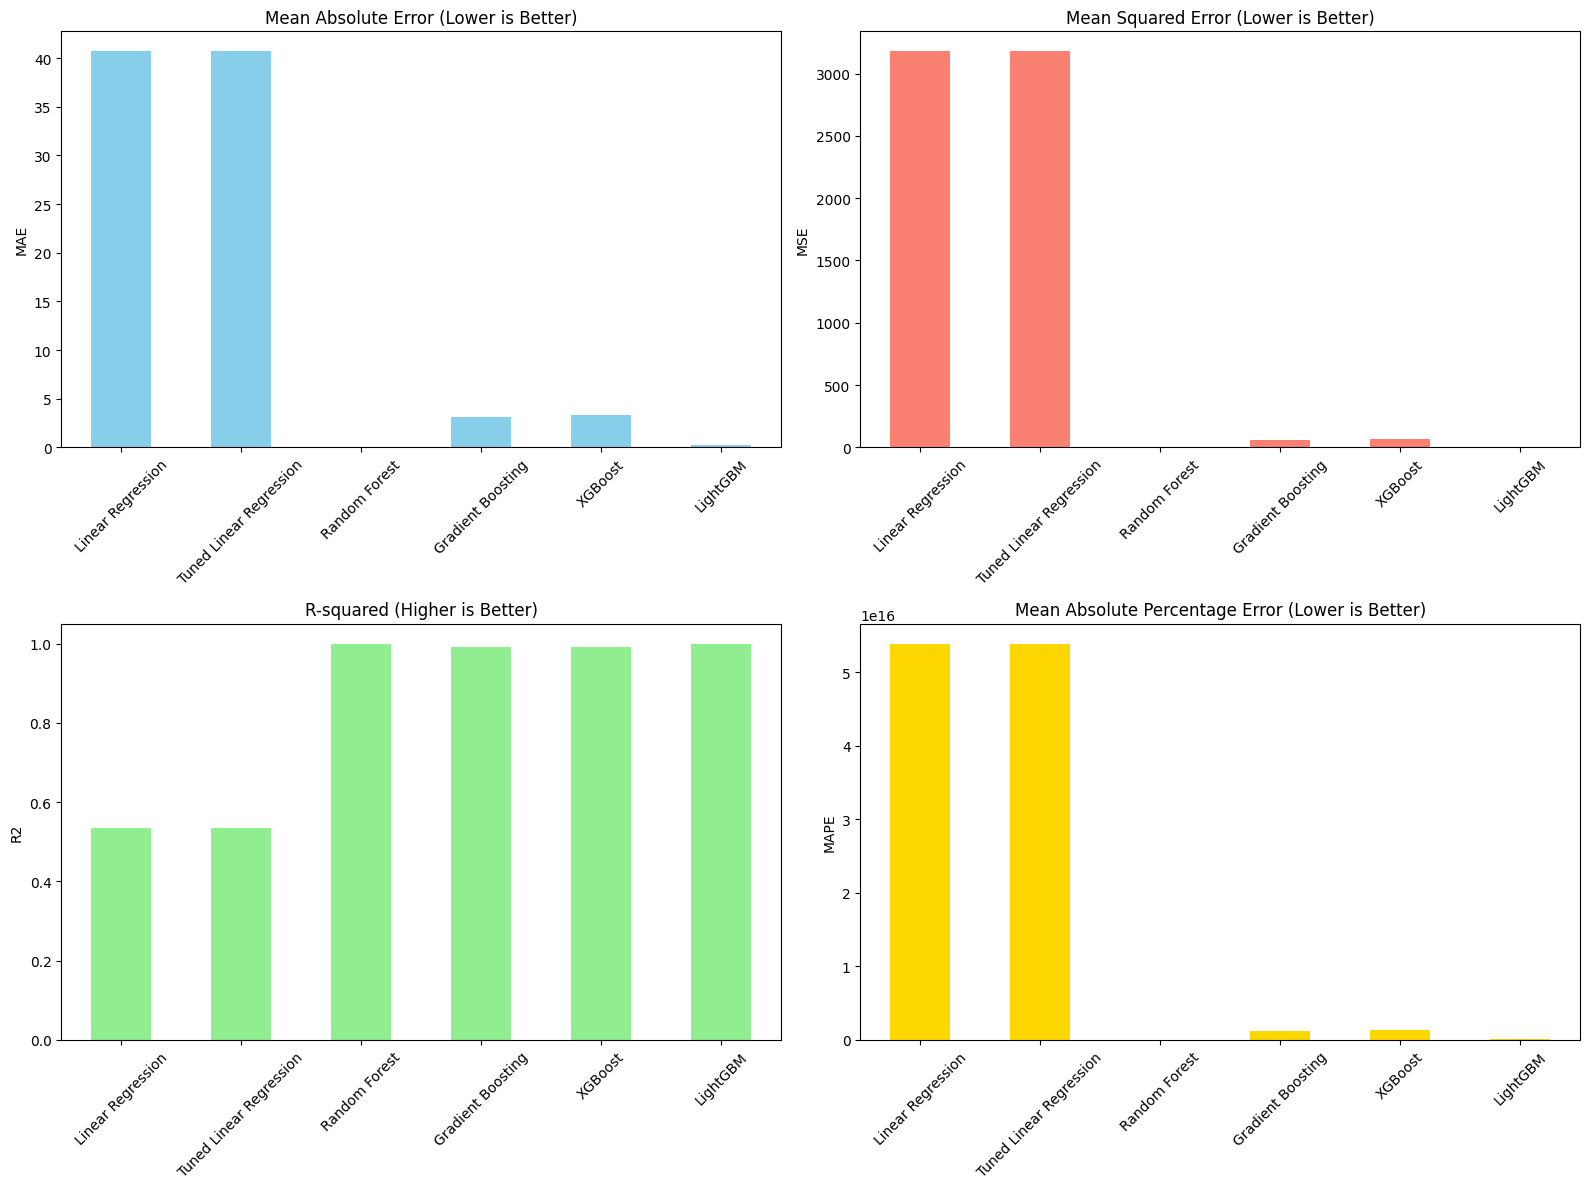

In [ ]:
# Based on R-squared (higher is better)
best_r2_model = performance_df['R2'].idxmax()
print(f"\nBest model based on R-squared: {best_r2_model} (R2: {performance_df['R2'].max():.2f})")

# Based on Mean Absolute Error (lower is better)
best_mae_model = performance_df['MAE'].idxmin()
print(f"Best model based on Mean Absolute Error: {best_mae_model} (MAE: {performance_df['MAE'].min():.2f})")

# Based on Mean Squared Error (lower is better)
best_mse_model = performance_df['MSE'].idxmin()
print(f"Best model based on Mean Squared Error: {best_mse_model} (MSE: {performance_df['MSE'].min():.2f})")

# Based on Mean Absolute Percentage Error (lower is better)
best_mape_model = performance_df['MAPE'].idxmin()
print(f"Best model based on Mean Absolute Percentage Error: {best_mape_model} (MAPE: {performance_df['MAPE'].min():.2f})")

# Visual comparison of metrics
performance_df.plot(kind='bar', figsize=(14, 7))
plt.title('Model Performance Comparison Across Metrics')
plt.ylabel('Metric Value')
plt.xticks(rotation=45, horizontalalignment='right')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Plotting specific metrics for better visibility
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

performance_df['MAE'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Mean Absolute Error (Lower is Better)')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].tick_params(axis='x', rotation=45)

performance_df['MSE'].plot(kind='bar', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Mean Squared Error (Lower is Better)')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].tick_params(axis='x', rotation=45)

performance_df['R2'].plot(kind='bar', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('R-squared (Higher is Better)')
axes[1, 0].set_ylabel('R2')
axes[1, 0].tick_params(axis='x', rotation=45)

performance_df['MAPE'].plot(kind='bar', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Mean Absolute Percentage Error (Lower is Better)')
axes[1, 1].set_ylabel('MAPE')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()